<a href="https://colab.research.google.com/github/yaseemarusiru/Image_Processing_and_Machine_Vision/blob/main/EN3160_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

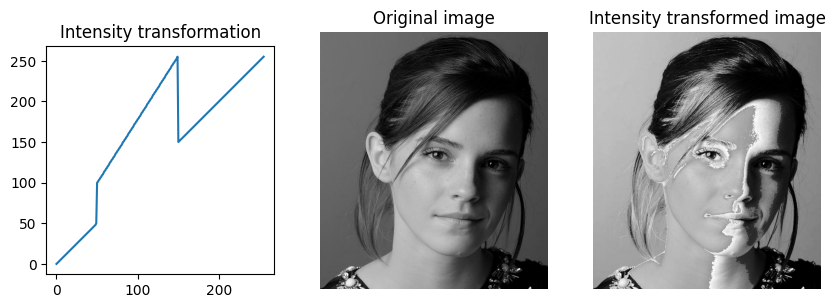

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

gray_image = cv.imread("a1images/emma.jpg",cv.IMREAD_GRAYSCALE)
assert gray_image is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
transformation = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
assert len(t)==256
g = cv.LUT(gray_image,transformation)

fig, ax = plt.subplots(1,3,figsize=(10,10))

ax[0].plot(t)
ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')

ax[1].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed image")
plt.show()

Question 2

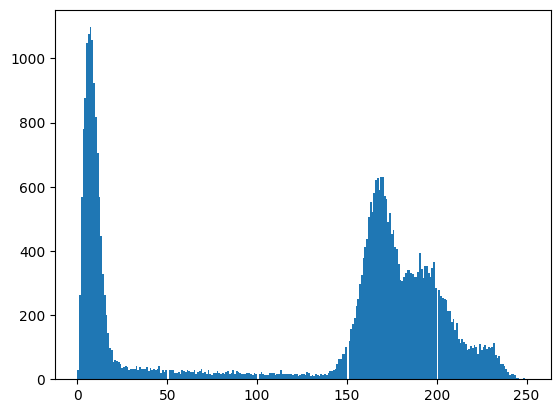

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain_image = cv.imread("a1images/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert brain_image is not None

plt.hist(brain_image.ravel(), bins=256);

Second peak seem to be in the range 75 - 185. Third peak seem to be in the range 190 and above. So we will enhance those ranges to get greay and white matter.

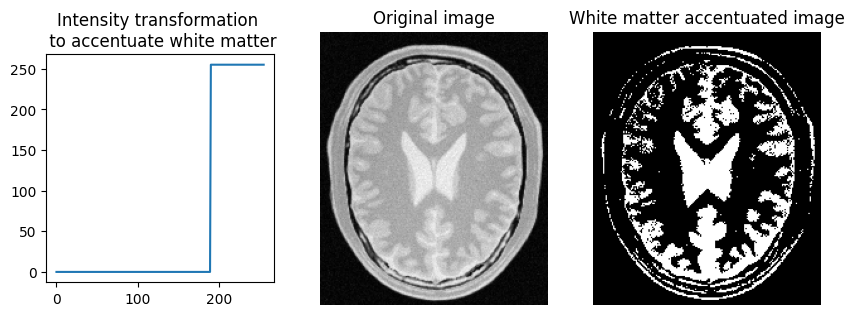

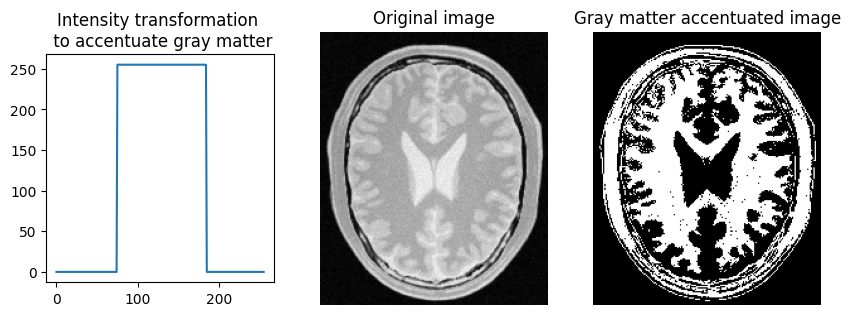

In [41]:
t1_1 = np.zeros(190)
t2_1 = 255*np.ones(66)
t3_1 = np.zeros(0)
transformation_1 = np.concatenate((t1_1,t2_1,t3_1),axis=0).astype(np.uint8)
assert len(transformation_1)==256

t1_2 = np.zeros(75)
t2_2 = 255*np.ones(110)
t3_2 = np.zeros(71)
transformation_2 = np.concatenate((t1_2,t2_2,t3_2),axis=0).astype(np.uint8)
assert len(transformation_2)==256

white_matter = cv.LUT(brain_image,transformation_1)
grey_matter = cv.LUT(brain_image,transformation_2)

fig1, ax1 = plt.subplots(1,3,figsize=(10,10))
ax1[0].plot(transformation_1)
ax1[0].set_aspect('equal')
ax1[0].set_title("Intensity transformation \n to accentuate white matter")

ax1[1].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax1[1].axis('off')
ax1[1].set_title("Original image")

ax1[2].imshow(cv.cvtColor(white_matter,cv.COLOR_BGR2RGB))
ax1[2].axis('off')
ax1[2].set_title("White matter accentuated image")

fig2, ax2 = plt.subplots(1,3,figsize=(10,10))
ax2[0].plot(transformation_2)
ax2[0].set_aspect('equal')
ax2[0].set_title("Intensity transformation \n to accentuate gray matter")

ax2[1].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax2[1].axis('off')
ax2[1].set_title("Original image")

ax2[2].imshow(cv.cvtColor(grey_matter,cv.COLOR_BGR2RGB))
ax2[2].axis('off')
ax2[2].set_title("Gray matter accentuated image")
plt.show()

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread("a1images/highlights_and_shadows.jpg")  # Replace with your actual image path
assert image is not None

# Convert the image from BGR to L*a*b* color space
lab_image = cv.cvtColor(image, cv.COLOR_BGR2LAB)

# Split into L, a, b channels
L, a, b = cv.split(lab_image)

# Normalize L channel to range [0, 1] for gamma correction
L_normalized = L / 255.0

# (a) Apply gamma correction (choose a gamma value, e.g., 0.5 for brightening)
gamma = 0.5
L_corrected = np.power(L_normalized, gamma)

# Rescale L_corrected back to range [0, 255]
L_corrected = np.uint8(L_corrected * 255)

# Merge the corrected L with the original a and b channels
corrected_lab_image = cv.merge((L_corrected, a, b))

# Convert corrected LAB image back to BGR
corrected_image = cv.cvtColor(corrected_lab_image, cv.COLOR_LAB2BGR)

# (b) Show the histograms of the original and gamma-corrected L channels
plt.figure(figsize=(12, 6))

# Original L channel histogram
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7, label='Original L')
plt.title('Original L Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()

# Gamma-corrected L channel histogram
plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7, label=f'Gamma Corrected L (γ={gamma})')
plt.title('Gamma Corrected L Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


AssertionError: 